In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Task 1

<i>
    Find the dimensions (height - $ h $, radius - $ r $) that will minimize 
the surface areaof the metal to manufacture a circular cylindrical can of volume $ V $.
</i>

### Solution

$$
\begin{cases}
    V = \pi r^2 h = const \\
    min_{h, r} S(h, r) = 2 \pi r h + 2 \pi r^2
\end{cases}
\implies
\begin{cases}
    h = \dfrac{V}{\pi r^2} \\
    min_{r} A(r) = \dfrac{2 V}{r} + 2 \pi r^2
\end{cases}
$$

Point that minimize $ A(r) $ must satisfy to the condition $$ d A(h, r) = 0, d^2 A(r) > 0 $$

$$
\dfrac{d A}{d r} = -\dfrac{2 V}{r^2} + 4 \pi r = \dfrac{- 2 V + 4 \pi r^3}{r^2} = 0 \\
\begin{cases}
    - 2 V + 4 \pi r^3 = 0 \\
    r \ne 0 \\
    h = \dfrac{V}{\pi r^2}
\end{cases} \implies
\begin{cases}
    r = {\left ( \dfrac{V}{2 \pi} \right ) }^{\dfrac{1}{3}} \\
    h = \dfrac{V}{\pi {\left ( \dfrac{V}{2 \pi} \right ) }^{\dfrac{2}{3}}}
\end{cases} \implies
\begin{cases}
    r = {\left ( \dfrac{2 V}{4 \pi} \right ) }^{\dfrac{1}{3}} \\
    h = \dfrac{V^{\dfrac{1}{3}}}{\pi {\left ( \dfrac{1}{2 \pi} \right ) }^{\dfrac{2}{3}}} \\
    \textbf{For all } V \geq 0
\end{cases}
$$

## Task 2

Consider the unconstrained optimization problem to minimize the function 
$$ f(x) = \dfrac{3}{2} (x^2_1 + x^2_2) + (1 + a) x_1 x_2 − (x_1 + x_2) + b $$
, where $ a $ and $ b $ are real-valued parameters. Find all values of $ a $ and $ b $ such that the problem has a unique optimal solution.

### Solution

$ f(x_1, x_2) = \dfrac{3}{2} (x^2_1 + x^2_2) + (1 + a) x_1 x_2 − (x_1 + x_2) + b $
Criteria for minimum:
$$
\begin{cases}
    d f(x_1, x_2) = 0 \\
    d^2 f(x_1, x_2) \geq 0
\end{cases}
\implies
\begin{cases}
    d f(x_1, x_2) = \left (3 x_1 + (1 + a) x_2 - 1 \right ) d x_1 + \left (3 x_2 + (1 + a) x_1 - 1 \right ) d x_2 \\
    d^2 f(x_1, x_2) = 7 + a \geq 0
\end{cases}
$$

In matrix form:
$$
\begin{bmatrix}
    3 & 1 + a \\
    1 + a & 3
\end{bmatrix} 
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix} = 
\begin{bmatrix}
    1 \\
    1
\end{bmatrix} \implies
$$
<strong>Cramer's rule</strong>
$$
\begin{cases}
    det = 9 - ({1 + a})^2 \neq 0 \\
    det_{x_1} = 3 - (a + 1) \\
    det_{x_2} = 3 - (a + 1)
\end{cases} \implies
x_1 = x_2 = \dfrac{1}{4 + a} \implies a \neq -4
\implies
\begin{cases}
    a \geq -7 \\
    a \neq 2 \\
    a \neq -4 \\
    \textbf{For all } b
\end{cases} \implies
$$

## Task 3

In [65]:
def f(args):
    
    global p
    
    p += 1
    
    if np.square(np.linalg.norm(args + 5)) > 25:
         return float('inf')
        
    x = args[0]
    y = args[1]
    
    total = np.sin(y) * np.exp(np.square(1 - np.cos(x))) +\
            np.cos(x) * np.exp(np.square(1 - np.sin(y))) +\
            np.square(x - y)
    
    return total

### Contour plot

In [76]:
x = np.linspace(-10, 0, 101)
y = np.linspace(-10, 0, 101)
xx, yy = np.meshgrid(x, y, indexing='xy')

In [77]:
points_set = np.empty((0, 2))
for i in range(len(xx)):
    points_set = np.append(points_set, np.array(list(zip(xx[i], yy[i]))), axis=0)

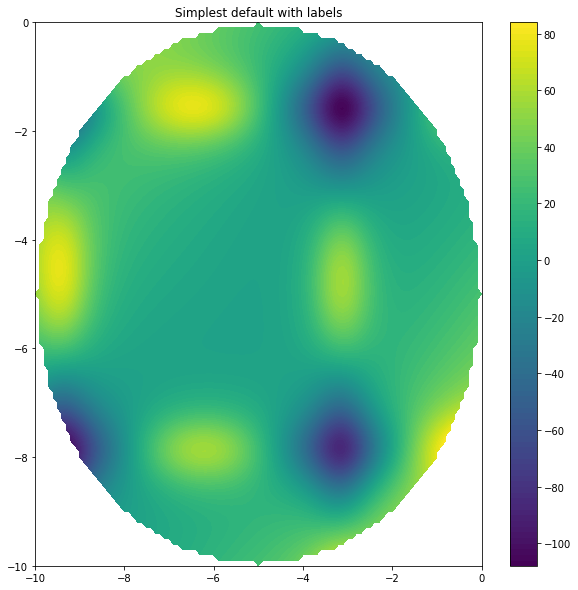

In [83]:
zz = np.apply_along_axis(f, 1, points_set)

X = np.reshape(points_set[:, 0], (101, 101))
Y = np.reshape(points_set[:, 1], (101, 101))
Z = np.reshape(zz, (101, 101))

plt.figure(figsize=(10,10))
plt.contourf(X, Y, Z, levels=100)
plt.colorbar()
plt.title('Simplest default with labels');

In [89]:
def nelder_mead(func : callable, x_0 : list, 
                alpha=1, beta=0.5, gamma=2, max_iter=-1, 
                step=0.01, ro=0.5, tol=1e-9):
    
    hist = []
    
    points = np.zeros((len(x_0) + 1, len(x_0)))
    
    for i in range(len(x_0)):
        points[i, :] = x_0
        points[i, :] += step
    
    scored = sorted([ (point, func(point)) for point in points ], 
                    key=lambda x: x[1])
    
#     print(scored)
    
    if max_iter == -1:
        max_iter = 25
    
    iter_num = 0
    
    while iter_num < max_iter and np.linalg.norm(scored[-1][0] - scored[-2][0]) > tol:
        
        scored = sorted([ [point, func(point)] for point in points ], 
                        key=lambda x: x[1])
        
        hist.append(scored)
        
        iter_num += 1
        
        # Sort (1)
        x_h = scored[-1][0]
        f_h = scored[-1][1]
        
#         print(x_h, f_h)
        
        x_l = scored[0][0]
        f_l = scored[0][1]
        
        x_g = scored[-2][0]
        f_g = scored[-2][1]
        
        # Center of gravity (2)
        x_c = sum([p[0] for p in scored[:-1]]) / (len(scored) - 1)
        
        # Reflection (3)
        x_r = x_c + alpha * (x_c - x_h)
        f_r = func(x_r)
        
        # Comparison (4)
        x_e = x_c + gamma * (x_r - x_c)
        f_e = func(x_e)
        row_h = np.where((points == x_h).all(axis=1))[0][0]
        
        # 4(a)
        if f_r < f_l: 
            if f_e < f_l:
                x_h = x_e
                points[row_h, :] = x_e
                continue
                
            elif f_e > f_l:
                x_h = x_r
                points[row_h, :] = x_r
                continue
        
        # 4(b)
        if f_l < f_r < f_g:
            x_h = x_r
            points[row_h, :] = x_r
            continue
        
        # 4(c)
        if f_h > f_r > f_g:
            x_h = x_r
            points[row_h, :] = x_r
        
        # Contraction (5)
        x_s = x_c + beta * (x_h - x_c)
        f_s = func(x_s)
        
        # (6)
        if f_s < f_h:
            x_h = x_s
            points[row_h, :] = x_s
            continue
        
        # (7)
        if f_s < f_h:
            for i in range(points.shape[0]):
                points[i, :] = x_l + (points[i, :] - x_l) / 2
    
    
    scored = sorted([ (point, func(point)) for point in points ], 
                        key=lambda x: x[1])
    return scored[-1][0], hist

#### Starts from different points

In [128]:
global p
p = 0
x_opt, hist = nelder_mead(func=f, x_0=np.array([-3, -2]), step=0.1, max_iter=125)
f_opt = f(x_opt)

In [129]:
print("x_opt : {} \nf_opt : {} \nOracle calls : {}".format(x_opt, f_opt, p - 1))

x_opt : [-2.92845816 -1.918645  ] 
f_opt : -88.03652366117646 
Oracle calls : 206


In [130]:
global p
p = 0
x_opt, hist = nelder_mead(func=f, x_0=np.array([-3, -1]), step=0.1, max_iter=125)
f_opt = f(x_opt)

In [131]:
print("x_opt : {} \nf_opt : {} \nOracle calls : {}".format(x_opt, f_opt, p - 1))

x_opt : [-3.28347604 -1.13341578] 
f_opt : -80.31254749659469 
Oracle calls : 658
